**01_data_loading_and_inspection.ipynb**

In [4]:
import pandas as pd

# Load data
path = "data/Heli_crashes.csv"
try:
    df = pd.read_csv('/content/Heli_crashes.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    raise Exception(f"File not found: /content/Heli_crashes.csv")

Data loaded successfully.


**# Inspect data**

In [5]:
print("First 5 rows:")
display(df.head())

print("\nData Info:")
print(df.info())

print("\nSummary Statistics:")
display(df.describe(include="all"))


First 5 rows:


,N ENGINE,N SEATS,N BLADES,RD,MTOW,Label
0,2,28,5,18.9,8618,0
1,2,28,5,18.9,8618,0
2,2,28,5,18.9,8618,0
3,2,28,5,18.9,8618,1
4,2,28,5,18.9,8618,1



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   N ENGINE  8278 non-null   int64  
 1   N SEATS   8278 non-null   int64  
 2   N BLADES  8278 non-null   int64  
 3   RD        8278 non-null   float64
 4   MTOW      8278 non-null   int64  
 5   Label     8278 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 388.2 KB
None

Summary Statistics:


,N ENGINE,N SEATS,N BLADES,RD,MTOW,Label
count,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000,8278.000000
mean,1.250423,7.980913,3.063180,11.291290,3095.398043,0.169969
std,0.433283,5.201939,1.061135,2.401579,2939.108765,0.375628
min,1.000000,1.000000,2.000000,7.000000,599.000000,0.000000
25%,1.000000,5.000000,2.000000,10.160000,1451.000000,0.000000
50%,1.000000,7.000000,3.000000,10.670000,2268.000000,0.000000
75%,2.000000,8.000000,4.000000,11.280000,3175.000000,0.000000
max,2.000000,44.000000,7.000000,21.950000,23133.000000,1.000000


# Save initial inspection report

In [7]:
import os

# Create the 'results' directory if it doesn't exist
os.makedirs('results', exist_ok=True)

df.describe(include="all").to_csv("results/summary_initial.csv")

# 2_data_cleaning_and_feature_engineering.ipynb

In [12]:
import pandas as pd
import numpy as np

# Load raw data
df = pd.read_csv('/content/Heli_crashes.csv')

# --- CLEANING ---
# Remove duplicates
df = df.drop_duplicates()
# Fill numeric missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(0)

# Drop columns with >60% missing
missing_pct = df.isnull().mean()
cols_to_drop = missing_pct[missing_pct > 0.6].index
df = df.drop(columns=cols_to_drop)




# FEATURE ENGINEERING

In [14]:
import os

if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
else:
    df["year"] = np.nan
    df["month"] = np.nan

fatal_col = "fatalities" if "fatalities" in df.columns else None
injury_col = "injuries" if "injuries" in df.columns else None

if fatal_col and injury_col:
    df["severity_score"] = df[fatal_col]*3 + df[injury_col]
else:
    df["severity_score"] = np.nan

# Save cleaned dataset
os.makedirs('data', exist_ok=True)
df.to_csv("data/cleaned_heli_crashes.csv", index=False)
print("Cleaning and feature engineering complete. Cleaned data saved.")

Cleaning and feature engineering complete. Cleaned data saved.


# 03_visualization_and_insights.ipynb

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("data/cleaned_heli_crashes.csv")

# Set styles
plt.style.use("seaborn-v0_8")
sns.set(rc={'figure.figsize': (10, 5)})


# Crashes per Year

In [16]:
if "year" in df.columns and df["year"].notna().any():
    plt.figure()
    sns.countplot(x="year", data=df)
    plt.title("Crashes per Year")
    plt.xticks(rotation=45)
    plt.savefig("results/figures/crashes_per_year.png")
    plt.show()

# Severity Score Distribution

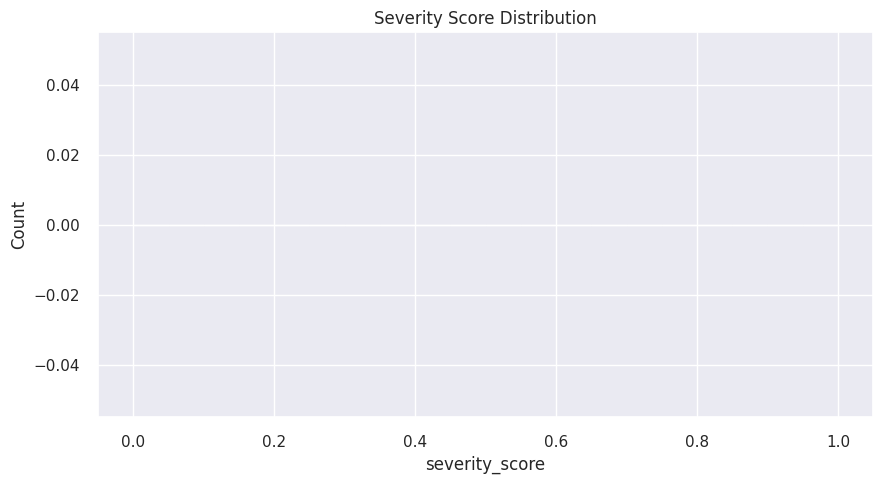

In [18]:
import os

if "severity_score" in df.columns:
    plt.figure()
    sns.histplot(df["severity_score"], kde=True, bins=20)
    plt.title("Severity Score Distribution")

    # Create the 'results/figures' directory if it doesn't exist
    os.makedirs('results/figures', exist_ok=True)

    plt.savefig("results/figures/severity_histogram.png")
    plt.show()

# Crashes by Month

In [19]:
if "month" in df.columns and df["month"].notna().any():
    plt.figure()
    sns.countplot(x="month", data=df)
    plt.title("Crashes by Month")
    plt.savefig("results/figures/crashes_by_month.png")
    plt.show()

# Scatterplot: Injuries vs Fatalities

In [22]:
fatal_col = "fatalities" if "fatalities" in df.columns else None
injury_col = "injuries" if "injuries" in df.columns else None
if fatal_col and injury_col:
    plt.figure()
    sns.scatterplot(x=df[injury_col], y=df[fatal_col])
    plt.title("Injuries vs Fatalities")
    plt.xlabel("Injuries")
    plt.ylabel("Fatalities")
    plt.savefig("results/figures/injuries_vs_fatalities_scatter.png")
    plt.show()

# Heatmap: Correlation of numeric features

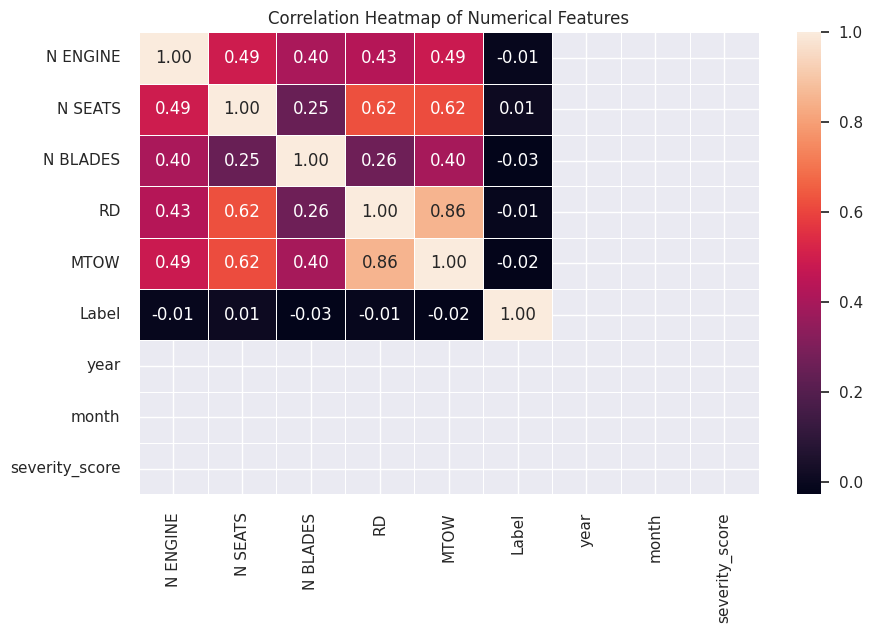

In [23]:
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32', 'float32'])
if not numeric_df.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap of Numerical Features")
    plt.savefig("results/figures/correlation_heatmap.png")
    plt.show()

# Pairplot of numeric features

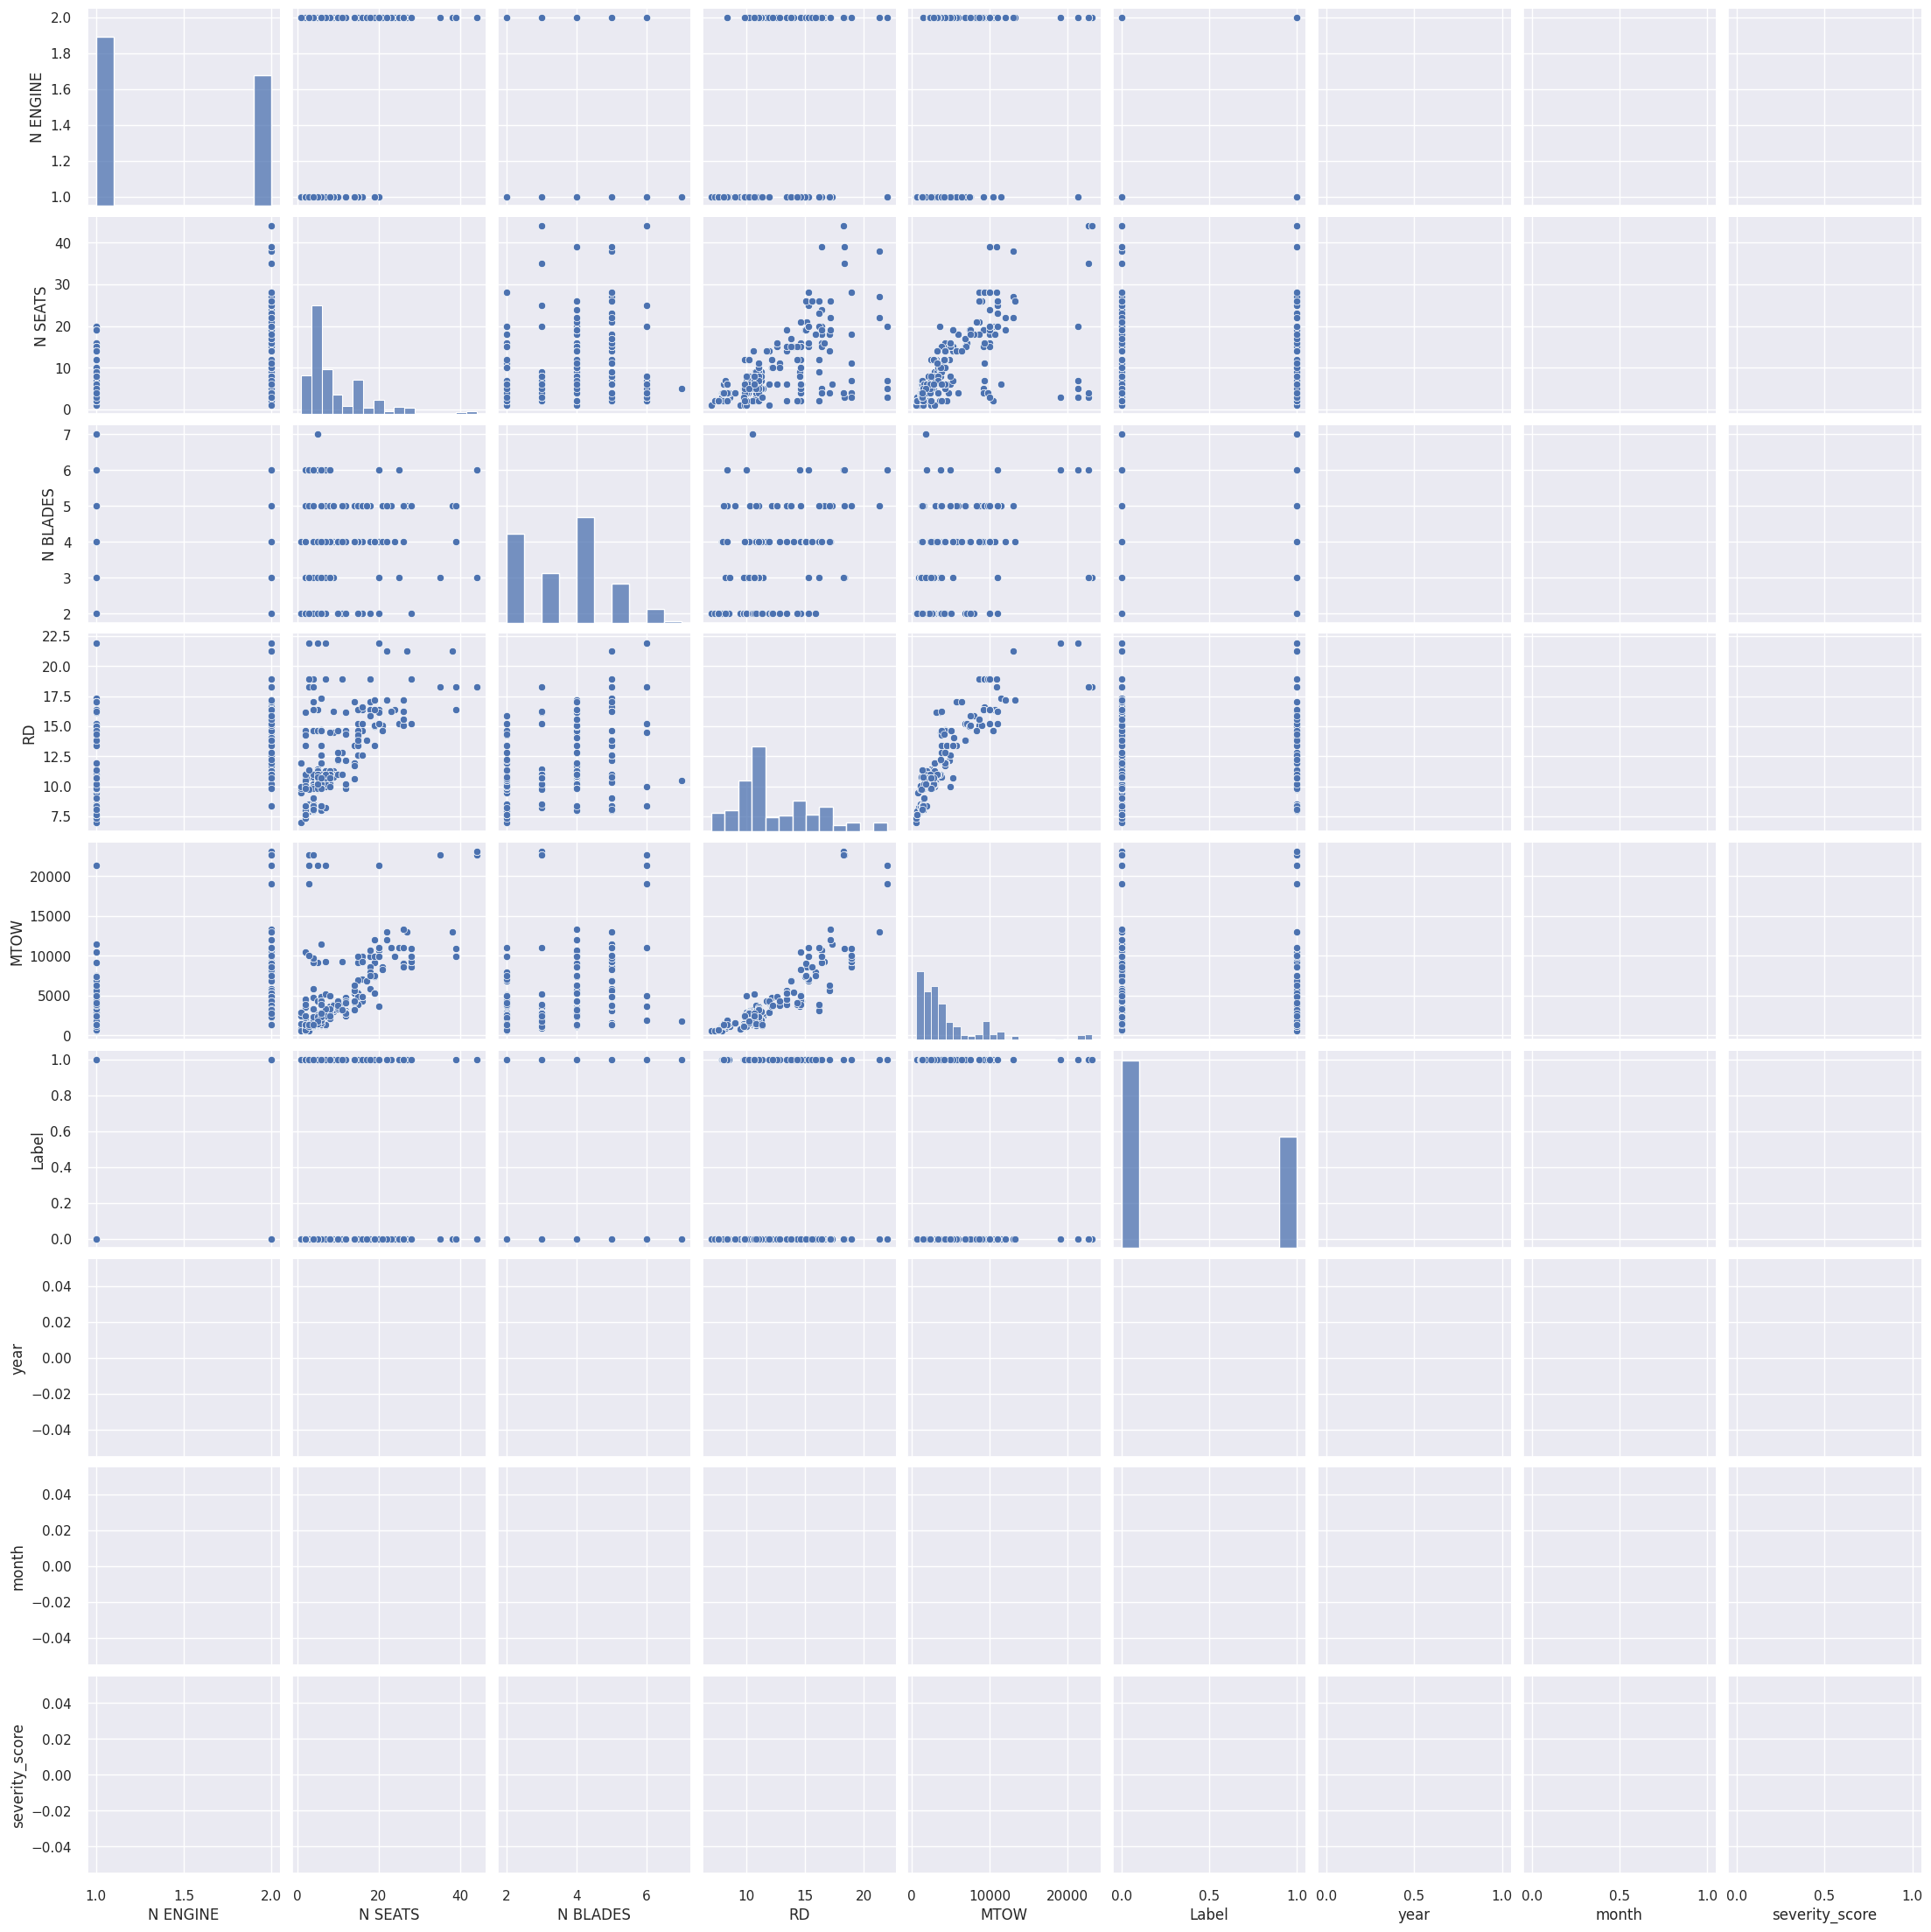

In [24]:
if len(numeric_df.columns) > 1:
    sns.pairplot(numeric_df)
    plt.savefig("results/figures/pairplot_numeric_features.png")

# 7. INSIGHTS SUMMARY

In [26]:
print(""" --------------------------------- INSIGHTS SUMMARY --------------------------------- 1. Crash Patterns: - Year and month plots show when most crashes happen. - Helps identify seasonal or annual trends. 2. Severity Insights: - Severity score reveals how serious crashes are. 3. Fatalities + Injuries: - Scatter plot shows severity clustering. - High points reflect deadly crashes. 4. Correlation Heatmap: - Highlights relationships between numeric variables. - Helps understand which factors rise together. 5. Contributing Factors (General Aviation Knowledge): • Weather issues (fog, storms, low visibility) • Mechanical failures (engine, rotor issues) • Pilot error or poor judgment • Hard landing zones • Night flying challenges • Poor aircraft maintenance """)

 --------------------------------- INSIGHTS SUMMARY --------------------------------- 1. Crash Patterns: - Year and month plots show when most crashes happen. - Helps identify seasonal or annual trends. 2. Severity Insights: - Severity score reveals how serious crashes are. 3. Fatalities + Injuries: - Scatter plot shows severity clustering. - High points reflect deadly crashes. 4. Correlation Heatmap: - Highlights relationships between numeric variables. - Helps understand which factors rise together. 5. Contributing Factors (General Aviation Knowledge): • Weather issues (fog, storms, low visibility) • Mechanical failures (engine, rotor issues) • Pilot error or poor judgment • Hard landing zones • Night flying challenges • Poor aircraft maintenance 
